In [53]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
import cv2
import warnings
warnings.filterwarnings("ignore")

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
pics=os.listdir("card_images")
pics_full = [i for i in pics if "full" in i]

In [3]:
meta_data = pd.read_csv("card_meta.csv")

In [108]:
meta_data.head()

,card_name,type,class,race,cardset,rarity,cost,attack,health,durability,craft_cost,disenchant_cost,artist,card_text,back_text,lore,format
0,"""Little Friend""",Minion,Neutral,NaN,Mean Streets of Gadgetzan,NaN,6,6,6,0,-1,-1,A.J. Nazzaro,NaN,NaN,NaN,NaN
1,A Light in the Darkness,Spell,Paladin,NaN,Whispers of the Old Gods,Common,2,0,0,0,40,5,Zoltan Boros,Discover a minion. Give it +1/+1.,"Wait, how can you have a light in the dark? If...",NaN,standard
2,A New Challenger...,Spell,Paladin,NaN,Rastakhan's Rumble,Epic,7,0,0,0,400,100,James Ryman,Discover a 6-Cost minion. Summon it with Taunt...,\xe2\x80\xa6 Arrives? Approaches? TELL US ALRE...,NaN,NaN
3,Aberrant Berserker,Minion,Neutral,NaN,Whispers of the Old Gods,Common,4,3,5,0,40,5,Jim Nelson,Has +2 Attack while damaged.,"I berserk, therefore I am.",NaN,standard
4,Abominable Bowman,Minion,Hunter,NaN,Knights of the Frozen Throne,Epic,7,6,7,0,400,100,L. Lullabi &amp; K. Turovec,Deathrattle: Summon a random friendly Beast th...,Frosty the Bowman... was an angry hateful soul...,NaN,standard


In [4]:
meta_data = meta_data[meta_data.type=="Minion"]

In [5]:
fig_mat = mpimg.imread("card_images/"+pics_full[0],0)

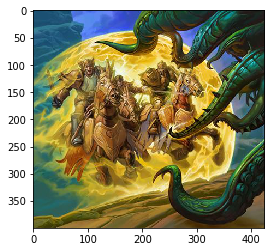

In [44]:
plt.imshow(fig_mat)

In [ ]:
### 灰度图，彩色图像cnn

In [45]:
fig_mat = cv2.cvtColor(fig_mat, cv2.COLOR_BGR2GRAY)

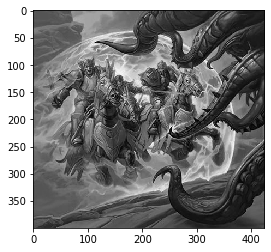

In [46]:
plt.imshow(fig_mat,cmap='gray')

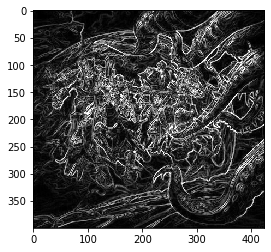

In [47]:
x = cv2.Sobel(fig_mat, cv2.CV_16S, 1, 0)
y = cv2.Sobel(fig_mat, cv2.CV_16S, 0, 1)
Scale_absX = cv2.convertScaleAbs(x)  
Scale_absY = cv2.convertScaleAbs(y)
result = cv2.addWeighted(Scale_absX, 0.5, Scale_absY, 0.5, 0)
plt.imshow(result,cmap='gray')

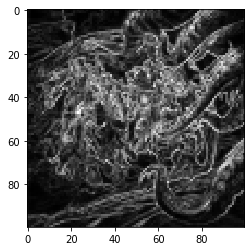

In [51]:
resized = cv2.resize(result, (100,100), interpolation = cv2.INTER_AREA)
plt.imshow(resized,cmap='gray')

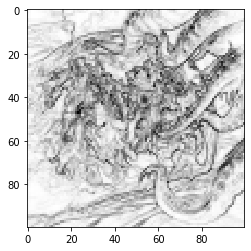

In [83]:
for i in range(resized.shape[0]):
    for j in range(resized.shape[1]):
        resized[i][j] = 255 - resized[i][j]
plt.imshow(resized,cmap='gray')

In [53]:
resized.shape

(100, 100)

In [107]:
meta_data["artist"].value_counts()

Matt Dixon         101
James Ryman         92
Jim Nelson          70
Zoltan Boros        70
Anton Zemskov       44
                  ... 
Kagi                 1
Alex Alexandrov      1
Kerem Beyit          1
Sedhayu Ardian       1
Robb Shoberg         1
Name: artist, Length: 297, dtype: int64

In [6]:
dic = {}
for name,artist in zip(meta_data["card_name"],meta_data["artist"]):
    dic[name] = artist

In [7]:
data = []

def gray(i):
    fig_mat = mpimg.imread("card_images/"+pics_full[i],0)
    fig_gray = cv2.cvtColor(fig_mat, cv2.COLOR_BGR2GRAY)
    return fig_gray

def outline(fig_gray):
    x = cv2.Sobel(fig_gray, cv2.CV_16S, 1, 0)
    y = cv2.Sobel(fig_gray, cv2.CV_16S, 0, 1)
    Scale_absX = cv2.convertScaleAbs(x)  
    Scale_absY = cv2.convertScaleAbs(y)
    result = cv2.addWeighted(Scale_absX, 0.5, Scale_absY, 0.5, 0)
    result = cv2.resize(result, (100,100), interpolation = cv2.INTER_AREA)
    result = result.reshape(-1).tolist()
#     print(len(result))
    return result

for i in range(len(pics_full)):
    name = pics_full[i][:-9]
    try:
        if dic[name] == "Matt Dixon":
            fig_gray = gray(i)
            fig_gray = outline(fig_gray)
            data.append(np.array(fig_gray+[0]))
        elif dic[name] == "James Ryman":
            fig_gray = gray(i)
            fig_gray = outline(fig_gray)
            data.append(np.array(fig_gray+[1]))
    except:
        continue

In [8]:
data_all = np.array(data)

In [9]:
data_all.shape

(187, 10001)

In [87]:
train_x,test_x,train_y,test_y = train_test_split(data_all[:,:-1],data_all[:,-1],stratify = data_all[:,-1],
                                                random_state = 123,test_size = 0.1)

In [48]:
print(train_x.shape)
print(test_x.shape)

(168, 10000)
(19, 10000)


In [301]:
n_components = 40

In [326]:
pca_0 = PCA()
pca_0.fit(train_x[train_y==0])
principle_0 = pca_0.components_
ratio_0 = pca_0.explained_variance_ratio_

Text(0, 0.5, 'Explained variance')

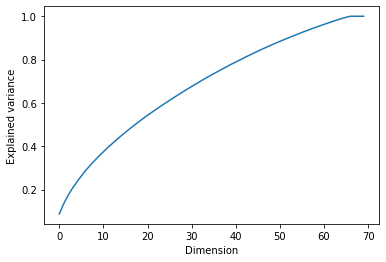

In [327]:
cumsum = np.cumsum(ratio_0)
plt.plot(cumsum)
plt.xlabel('Dimension')
plt.ylabel('Explained variance')

In [328]:
# n = 100
center_0 = principle_0[:n_components]

In [329]:
pca_1 = PCA()
pca_1.fit(train_x[train_y==1])
principle_1 = pca_1.components_
ratio_1 = pca_1.explained_variance_ratio_

Text(0, 0.5, 'Explained variance')

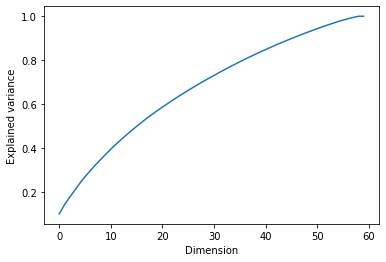

In [330]:
cumsum = np.cumsum(ratio_1)
plt.plot(cumsum)
plt.xlabel('Dimension')
plt.ylabel('Explained variance')

In [331]:
# n = 100
center_1 = principle_1[:n_components]

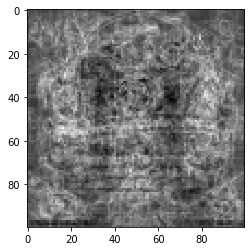

In [332]:
for i in range(1):
    img = plt.imshow(principle_0[i].reshape(100,100), cmap='gray')
    plt.show()

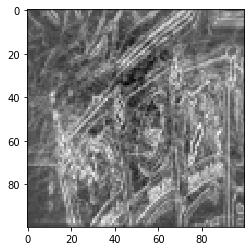

In [333]:
for i in range(1):
    img = plt.imshow(principle_1[i].reshape(100,100), cmap='gray')
    plt.show()

In [97]:
from scipy.optimize import leastsq

In [151]:
center_1.T.shape

(10000, 78)

In [152]:
center_0.T.shape

(10000, 90)

In [221]:
x = train_x[train_y==0][5]

In [29]:
# least square estimate

In [154]:
def func(k,center,x):
    res = x-np.dot(center.T,k)
    return res

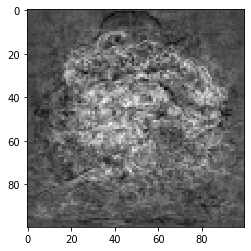

In [238]:
var= leastsq(func, np.array([1]*60), args=(center_0, x))
new_image = np.dot(center_0.T,np.array(var[0]))+var[1]
plt.imshow(new_image.reshape(100,100), cmap='gray')

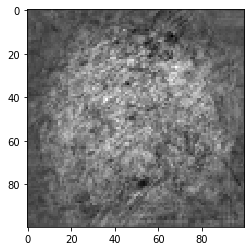

In [239]:
var= leastsq(func, np.array([1]*60), args=(center_1, x))
new_image = np.dot(center_1.T,np.array(var[0]))+var[1]
plt.imshow(new_image.reshape(100,100), cmap='gray')

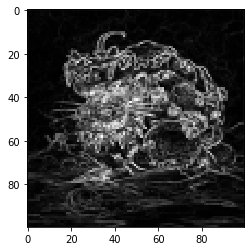

In [224]:
plt.imshow(x.reshape(100,100), cmap='gray')

In [76]:
# grid search the components selected to find out the best pca components for lower variance

In [102]:
def func(k,center,x):
    res = x.T-np.dot(center.T,k)
    return res

def crossvalid(train_x,train_y,fold=3,*args):
    interval = int(train_x.shape[0]/fold)
    comp = args[0]
    res = []
    for i in range(interval,train_x.shape[0],interval):
        train_inter = [j for j in range(i)] + [j for j in range(i+interval,train_x.shape[0])]
        val_inter = [j for j in range(i,i+interval)]
        train_x_cv = train_x[train_inter,:]
        valid_x_cv = train_x[val_inter,:]
        train_y_cv = train_y[train_inter]
        valid_y_cv = train_y[val_inter]
#         print(train_x_cv.shape)
#         print(train_y_cv.shape)
        pca_0 = PCA(comp)
        pca_1 = PCA(comp)
        pca_1.fit(train_x_cv[train_y_cv==1])
        center_1 = pca_1.components_
        pca_0.fit(train_x_cv[train_y_cv==0])
        center_0 = pca_0.components_
        correct = 0
        for j in range(valid_x_cv.shape[0]):
            x = valid_x_cv[j]
            var= leastsq(func, np.array([1]*center_0.shape[0]), args=(center_0, x))
            new_image = np.dot(center_0.T,np.array(var[0]))+var[1]
            sse_0 = np.sum(abs(x-new_image))
            var= leastsq(func, np.array([1]*center_1.shape[0]), args=(center_1, x))
            new_image = np.dot(center_0.T,np.array(var[0]))+var[1]
            sse_1 = np.sum(abs(x-new_image))
            if (sse_0 > sse_1 and valid_y_cv[j]==0) or (sse_0 < sse_1 and valid_y_cv[j]==1):
                correct+=1
        correct /= valid_x_cv.shape[0]
        res.append(correct)
        print(correct)
    return res

In [105]:
res = crossvalid(train_x,train_y,3,60)

0.6
0.4533333333333333


IndexError: index 226 is out of bounds for axis 0 with size 226

In [ ]:
### baseline

In [56]:
from sklearn.linear_model import LogisticRegression

In [ ]:
### generate data

In [12]:
def scale(train_x):
    return (train_x-np.mean(train_x,axis=0))/np.std(train_x,axis=0)
def generate(center_0,center_1,n_components,num):
    fake_pics = []
    for k in range(num):
        np.random.seed(k)
        rand_k = np.random.rand(n_components)
        new_image_0 = np.dot(center_0.T,rand_k)
        new_image_0 = np.append(new_image_0,0)
        new_image_1 = np.dot(center_1.T,rand_k)
        new_image_1 = np.append(new_image_1,1)
        fake_pics.append(new_image_0)
        fake_pics.append(new_image_1)
    fake_pics = np.array(fake_pics)
    fake_pics[:,:-1] = scale(fake_pics[:,:-1])
    return fake_pics

In [122]:
def crossvalid(train_x,train_y,fold=3,pca=0,*args):
    train_x_scale = scale(train_x)
    interval = int(train_x_scale.shape[0]/fold)
    if args:
        comp = args[0]
        gener_num = args[1]
    res = []
    for i in range(interval,train_x_scale.shape[0],interval):
        try:
            train_inter = [j for j in range(i)] + [j for j in range(i+interval,train_x_scale.shape[0])]
            val_inter = [j for j in range(i,i+interval)]
#             print(val_inter)
            train_x_cv = train_x_scale[train_inter,:]
            valid_x_cv = train_x_scale[val_inter,:]
            train_y_cv = train_y[train_inter]
            valid_y_cv = train_y[val_inter]
    #         print(train_x_cv.shape)
    #         print(train_y_cv.shape)
            
            if pca:
                pca_0 = PCA(comp)
                pca_1 = PCA(comp)
                pca_1.fit(train_x_cv[train_y_cv==1])
                center_1 = pca_1.components_
                pca_0.fit(train_x_cv[train_y_cv==0])
                center_0 = pca_0.components_
                fake_pics = generate(center_0,center_1,comp,gener_num)
                train_new = np.r_[np.c_[train_x_cv,train_y_cv],fake_pics]
                train_x_cv = train_new[:,:-1]
                train_y_cv = train_new[:,-1]
#             print("train",train_x_cv.shape)
#             print("valid",valid_x_cv.shape)
            lr_model = LogisticRegression(penalty= 'l1',random_state=0) 
            lr_model.fit(train_x_cv,train_y_cv)
            correct = lr_model.score(valid_x_cv,valid_y_cv)
            res.append(correct)
#             print(correct)
        except:
            pass
    return np.mean(res)

In [118]:
# logistic baseline without augmentation，without L1 penalty(Using L1 would result in worse accuracy)
res = crossvalid(train_x,train_y,4,0,0,0)
print("mean",np.mean(res))

mean 0.8412698412698413


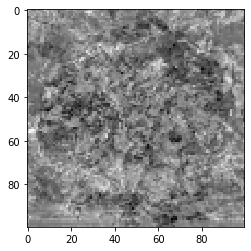

In [393]:
x = fake_pics[3][:-1]
plt.imshow(x.reshape(100,100), cmap='gray')

In [137]:
# with augmentation and L1 penalty
y = []
for i in range(10,301,10):
#     print(i)
    res=crossvalid(train_x,train_y,4,1,60,i)
    y.append(res)
#     print("mean",np.mean(res))

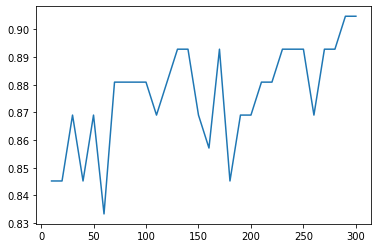

In [138]:
# augmentation number v.s. accuracy
plt.plot([i for i in range(10,301,10)],y)

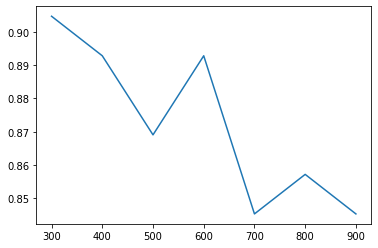

In [136]:
plt.plot([i for i in range(300,1000,100)],y)

Interestingly, when the augmentation pictures number reaches almost the 3 times the number of original training set, the cross validation mean accuracy reaches the top. When there are too much augmentation pictures, the cross validation accuracy begin to drop, but roughly steady between 0.85. The reason might be that the aumentation pictures number have evenly spread among the tensor space spanned by principle components. So the model is then steady. This also inspire me that if we have enough pictures to learn enough priciple components. Then we can get a picture space close the creation of the author. What we need to do is only to find out the distiance from the picture to learn to the space and judge if it's likely to be drwan by the author(Although this would requre quite a lot of creation of the author, but that make sense.)

In [139]:
y = []
for i in range(10,61,10):
#     print(i)
    res=crossvalid(train_x,train_y,4,1,i,30)
    y.append(res)
#     print("mean",np.mean(res))

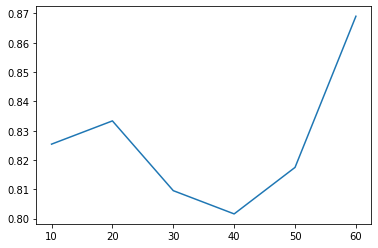

In [140]:
plt.plot([i for i in range(10,61,10)],y)

The more priciple components we use, the better accuracy is. There might be concern about overfitting. However, as far as the author is using the same style, we should consider using more principle components since all the works in same style should belong to the tensor space of principle components.